In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/My Drive/salezai/MajorProjectData.csv')
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,08/11/2017,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2,3,CA-2017-138688,12/06/2017,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,3,4,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,11/10/2016,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df["Order Date"] = pd.DatetimeIndex(df["Order Date"])


<ipython-input-4-11d3714726c1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Order Date"] = pd.DatetimeIndex(df["Order Date"])


In [5]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,0,1,CA-2017-152156,2017-08-11,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,1,2,CA-2017-152156,2017-08-11,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2,3,CA-2017-138688,2017-12-06,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,3,4,US-2016-108966,2016-11-10,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,4,5,US-2016-108966,2016-11-10,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Overview of Dataset

In [6]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,Unnamed: 0,int64,9800,0
1,Row ID,int64,9800,0
2,Order ID,object,4922,0
3,Order Date,datetime64[ns],1230,0
4,Customer ID,object,793,0
5,Customer Name,object,793,0
6,Segment,object,3,0
7,Region,object,4,0
8,Product ID,object,1861,0
9,Category,object,3,0


In [7]:
# Let's separate the year and put it into a separate column 
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Day'] = pd.DatetimeIndex(df['Order Date']).day

In [8]:
df['Day of Week'] = df['Order Date'].dt.strftime('%A')

In [9]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Customer ID,Customer Name,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Day of Week
0,0,1,CA-2017-152156,2017-08-11,RR-12520,Rajbeer,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,1,2,CA-2017-152156,2017-08-11,RR-12520,Rajbeer,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,2,3,CA-2017-138688,2017-12-06,SU-13045,Shanu,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,3,4,US-2016-108966,2016-11-10,VR-20335,Vipulander,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,4,5,US-2016-108966,2016-11-10,VR-20335,Vipulander,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9800.0,4899.500000,2829.160653,0.000,2449.750,4899.50,7349.250,9799.00
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
Year,9800.0,2016.724184,1.123984,2015.000,2016.000,2017.00,2018.000,2018.00
Month,9800.0,7.186122,3.424108,1.000,4.000,8.00,10.000,12.00
Day,9800.0,16.119184,8.073122,1.000,10.000,16.00,23.000,31.00


# EDA

In [11]:
best_customer = df.pivot_table(values = "Sales" , index = "Customer Name" , aggfunc = "sum")
best_customer = best_customer.sort_values(by=['Sales'], ascending=False).head(20)
best_customer.reset_index(inplace=True) 
best_customer['Sales']=best_customer['Sales'].round(2)
best_customer

,Customer Name,Sales
0,Partap,25043.05
1,Sahil,19052.22
2,Arjun,15117.34
3,Makbul,14595.62
4,Faizal,14473.57
5,Savan,14175.23
6,Zeenat,14142.33
7,Mamu,12873.30
8,Kosar,12209.44
9,Dhruv,12129.07


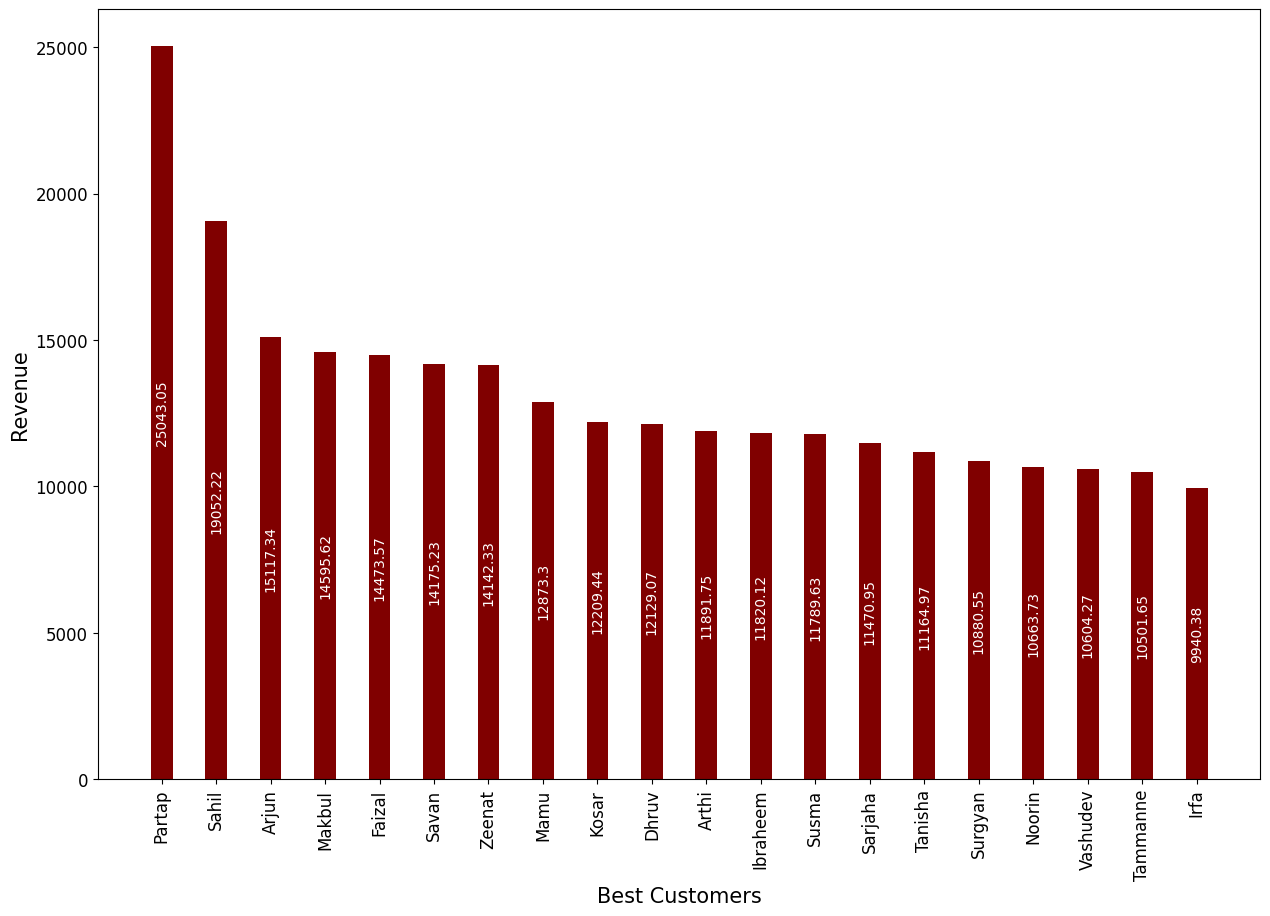

In [12]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(best_customer['Customer Name'],best_customer['Sales'] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Best Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_customer['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()


In [13]:
best_dayofweek = df.pivot_table(values = "Sales" , index = "Day of Week" , aggfunc = "sum")
best_dayofweek = best_dayofweek.sort_values(by=['Sales'], ascending=False).head(20)
best_dayofweek.reset_index(inplace=True) 
best_dayofweek['Sales']=best_dayofweek['Sales'].round(2)
best_dayofweek

,Day of Week,Sales
0,Saturday,394511.12
1,Tuesday,369922.11
2,Monday,355652.72
3,Wednesday,332748.51
4,Sunday,322770.80
5,Friday,257430.36
6,Thursday,228501.16


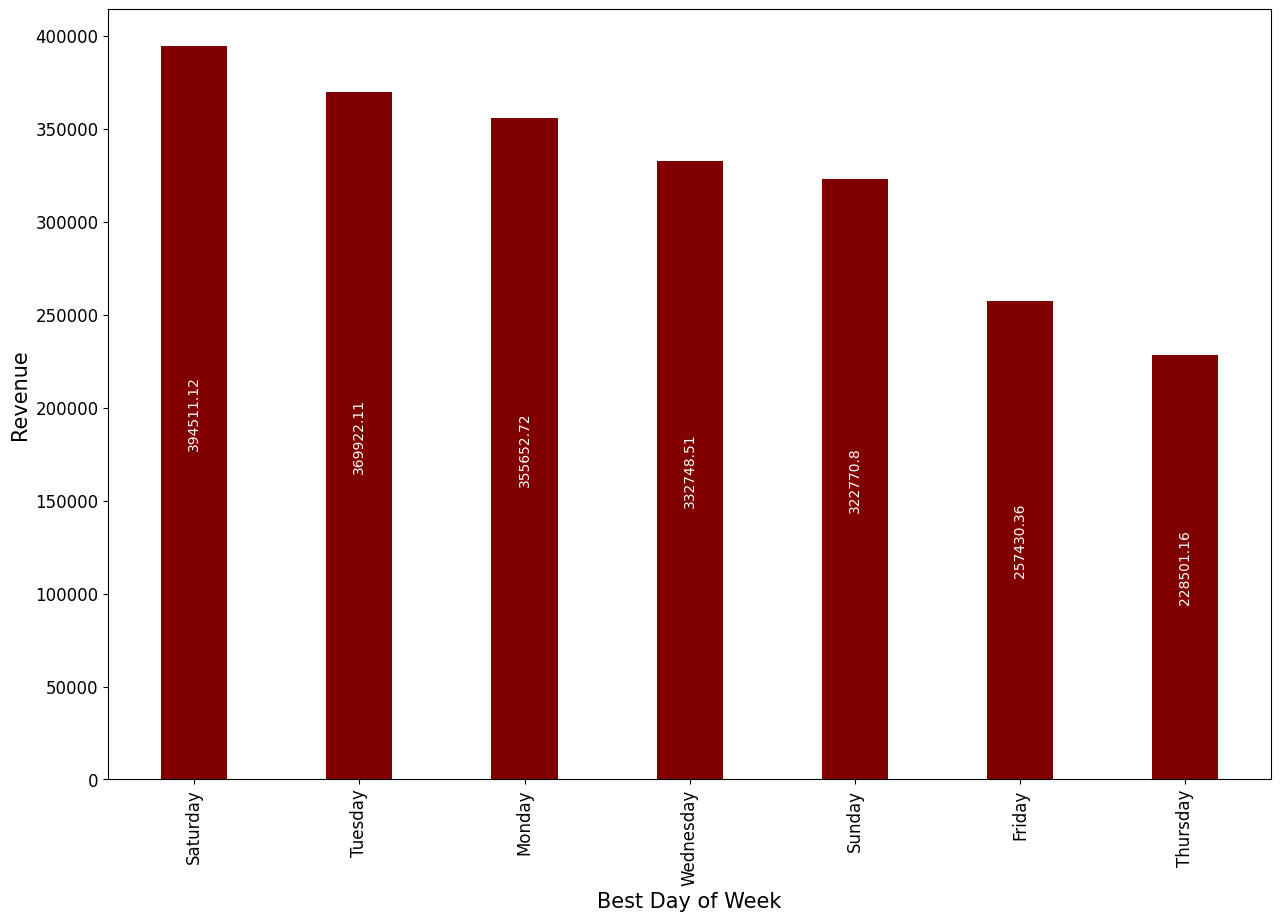

In [14]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(best_dayofweek['Day of Week'],best_dayofweek['Sales'] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Best Day of Week",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_dayofweek['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white')
plt.show()

In [15]:
best_category = df.pivot_table(values = "Sales" , index = "Category" , aggfunc = "sum")
best_category = best_category.sort_values(by=['Sales'], ascending=False).head()
best_category.reset_index(inplace=True)
best_category['Sales']=best_category['Sales'].round(2)
best_category

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


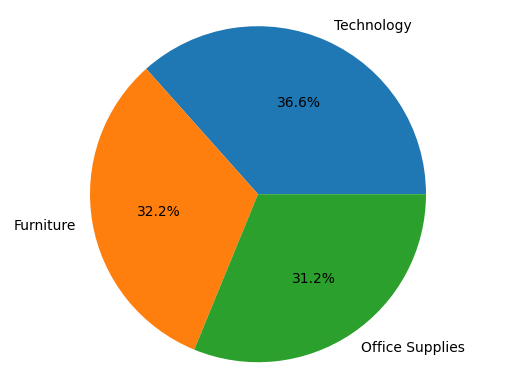

In [16]:
plt.pie(best_category['Sales'] , labels=best_category['Category'] , autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# MAKE PREDICTIONS

In [17]:
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
df1  = df[['Order Date','Sales']]
sales_prophet_df = df1.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [19]:
sales_prophet_df

,ds,y
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680
...,...,...
9795,2017-05-21,3.7980
9796,2016-12-01,10.3680
9797,2016-12-01,235.1880
9798,2016-12-01,26.3760


In [20]:
m = Prophet()
m.fit(sales_prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8y5zjt6/ybkye094.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp8y5zjt6/403bs7a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46153', 'data', 'file=/tmp/tmpp8y5zjt6/ybkye094.json', 'init=/tmp/tmpp8y5zjt6/403bs7a5.json', 'output', 'file=/tmp/tmpp8y5zjt6/prophet_modelc8gvvsv3/prophet_model-20230501173225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:32:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,219.097247,-575.352931,1060.003615,219.097247,219.097247,37.470123,37.470123,37.470123,0.531869,0.531869,0.531869,36.938254,36.938254,36.938254,0.0,0.0,0.0,256.567370
1,2015-01-03,219.231992,-553.682349,1003.726088,219.231992,219.231992,53.827516,53.827516,53.827516,17.930986,17.930986,17.930986,35.896530,35.896530,35.896530,0.0,0.0,0.0,273.059508
2,2015-01-04,219.366737,-625.988775,1037.636847,219.366737,219.366737,8.045289,8.045289,8.045289,-26.468992,-26.468992,-26.468992,34.514281,34.514281,34.514281,0.0,0.0,0.0,227.412026
3,2015-01-06,219.636227,-580.048587,1084.194686,219.636227,219.636227,12.216145,12.216145,12.216145,-18.818937,-18.818937,-18.818937,31.035081,31.035081,31.035081,0.0,0.0,0.0,231.852372
4,2015-01-07,219.770972,-516.312619,1058.319815,219.770972,219.770972,42.713657,42.713657,42.713657,13.600076,13.600076,13.600076,29.113582,29.113582,29.113582,0.0,0.0,0.0,262.484630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,2019-12-26,212.465843,-509.482685,1021.380896,195.120643,230.242122,49.472855,49.472855,49.472855,18.768857,18.768857,18.768857,30.703997,30.703997,30.703997,0.0,0.0,0.0,261.938698
1591,2019-12-27,212.444254,-504.270766,1031.554053,195.033606,230.335344,33.590256,33.590256,33.590256,0.531869,0.531869,0.531869,33.058387,33.058387,33.058387,0.0,0.0,0.0,246.034510
1592,2019-12-28,212.422665,-557.476521,1045.294284,194.949380,230.428567,52.896456,52.896456,52.896456,17.930986,17.930986,17.930986,34.965470,34.965470,34.965470,0.0,0.0,0.0,265.319121
1593,2019-12-29,212.401075,-552.888376,1023.834452,194.866840,230.512793,9.921993,9.921993,9.921993,-26.468992,-26.468992,-26.468992,36.390985,36.390985,36.390985,0.0,0.0,0.0,222.323068


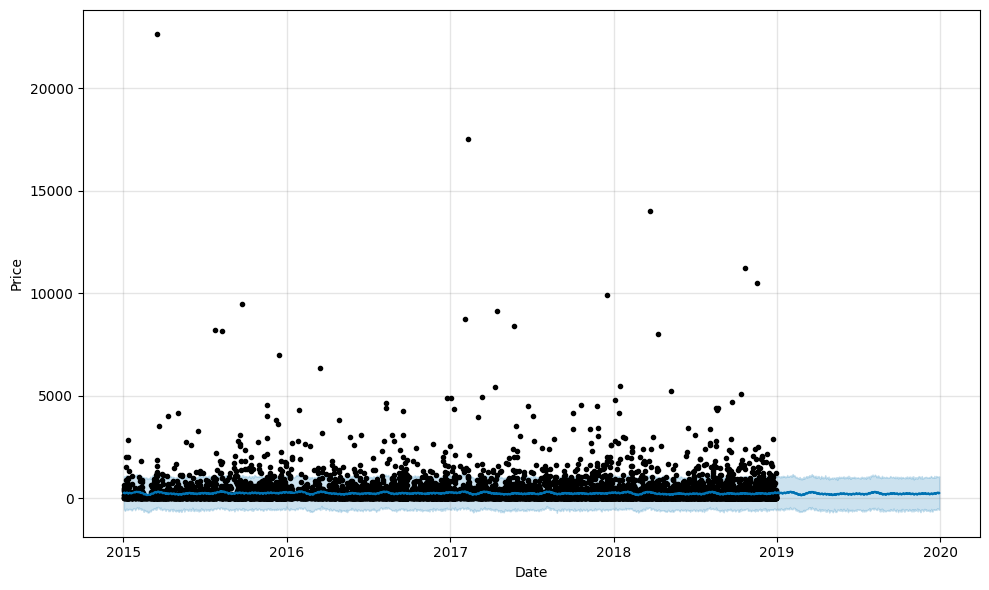

In [23]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

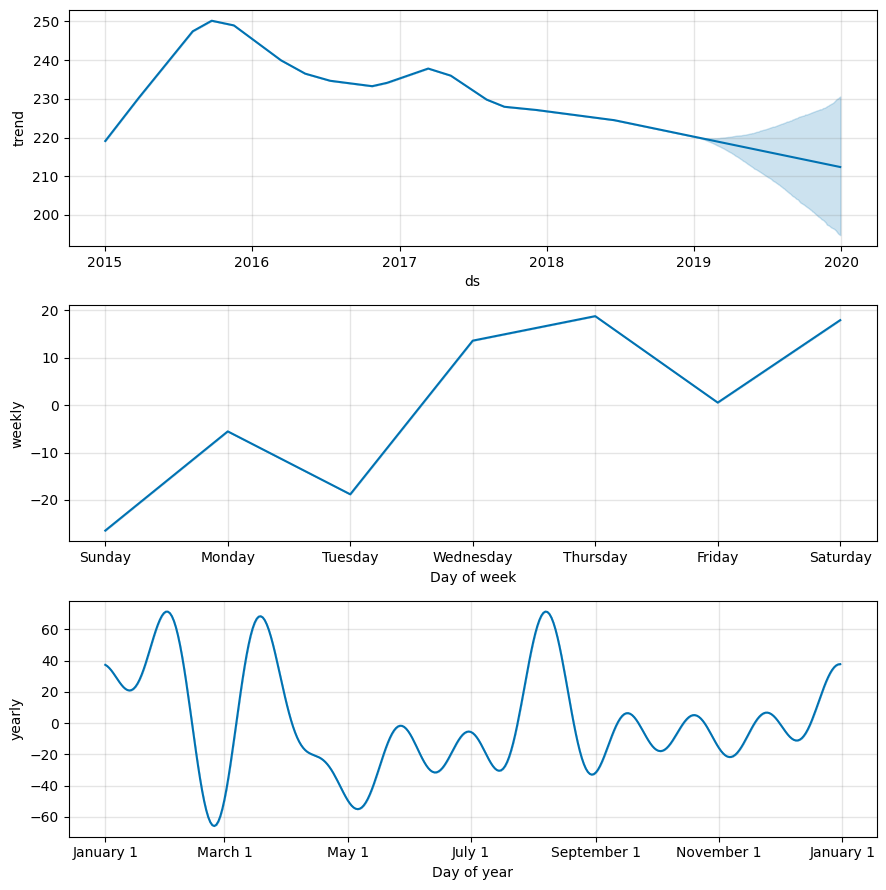

In [24]:
figure3 = m.plot_components(forecast)